# 3. Plots for Exploratory data analysis (EDA)

## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")



In [ ]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [ ]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

# (3.2) 2-D Scatter Plot

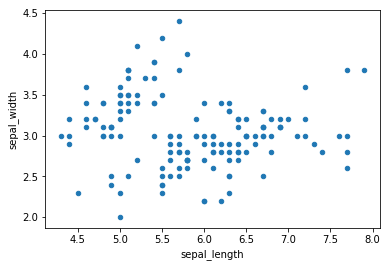

In [ ]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

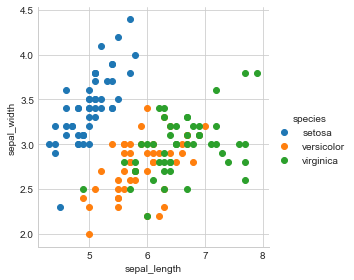

In [ ]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

#  (3.3) Pair-plot

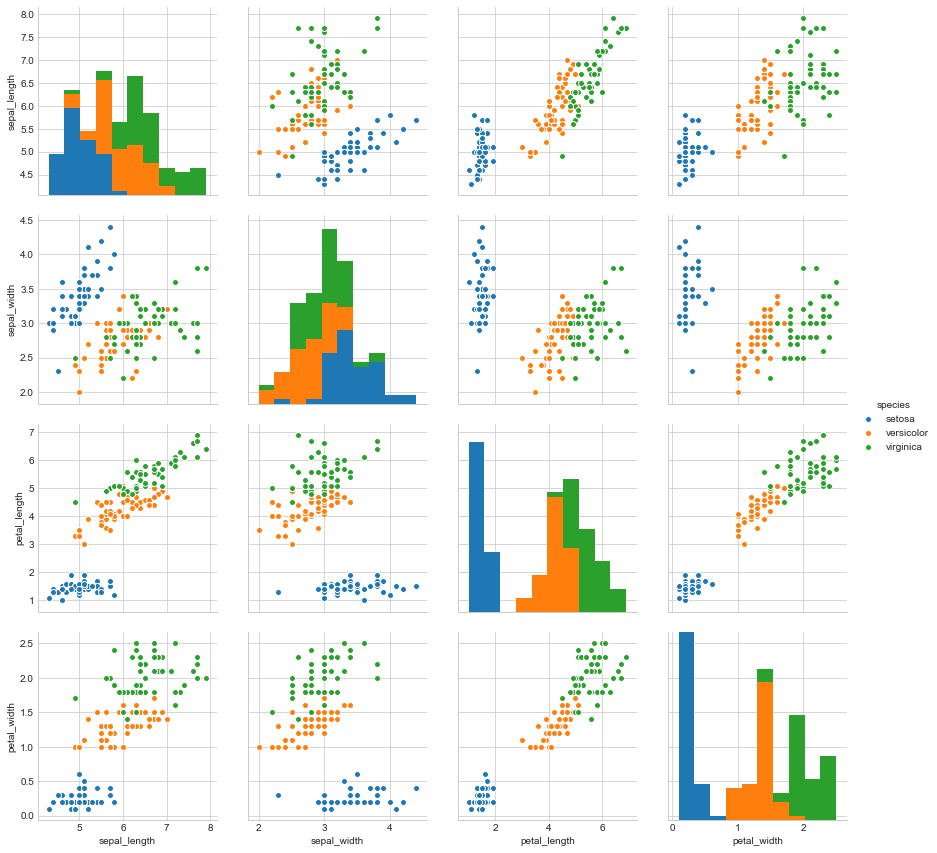

In [ ]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

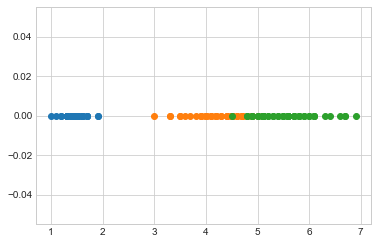

In [ ]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

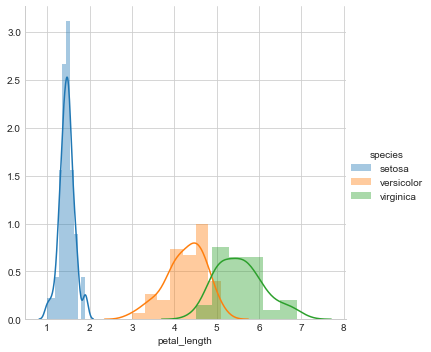

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();



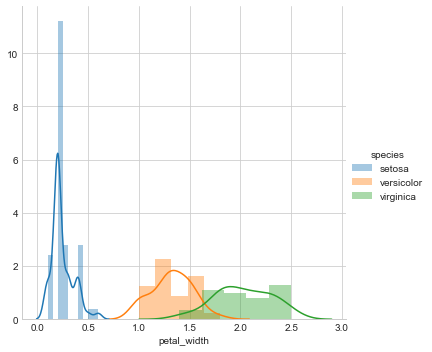

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

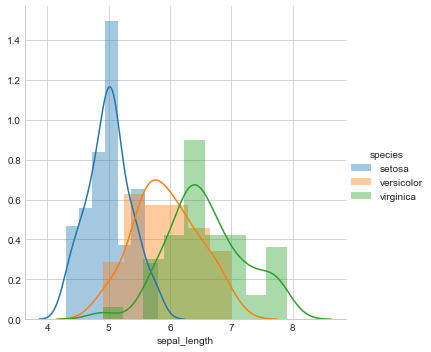

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

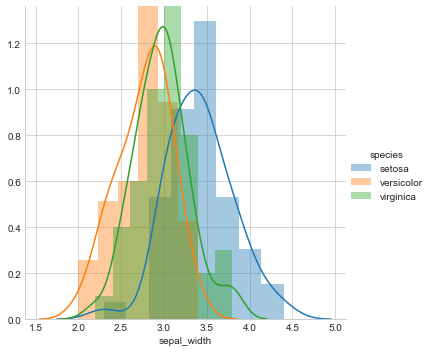

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]


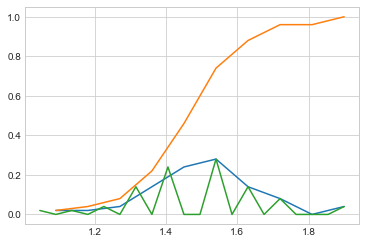

In [ ]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]


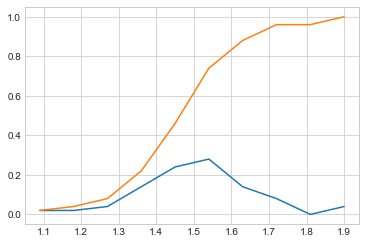

In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]
[ 0.02  0.1   0.24  0.08  0.18  0.16  0.1   0.04  0.02  0.06]
[ 4.5   4.74  4.98  5.22  5.46  5.7   5.94  6.18  6.42  6.66  6.9 ]
[ 0.02  0.04  0.06  0.04  0.16  0.14  0.12  0.2   0.14  0.08]
[ 3.    3.21  3.42  3.63  3.84  4.05  4.26  4.47  4.68  4.89  5.1 ]


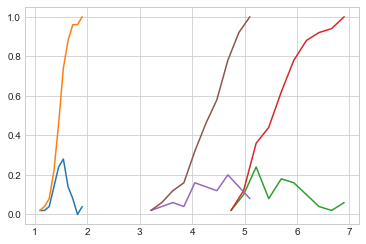

In [ ]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [ ]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.464
2.41568627451
5.552
4.26

Std-dev:
0.171767284429
0.546347874527
0.465188133985


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[ 1.     1.4    1.5    1.575]
[ 4.5    5.1    5.55   5.875]
[ 3.    4.    4.35  4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.148260221851
0.667170998328
0.518910776477


# (3.7) Box plot and Whiskers

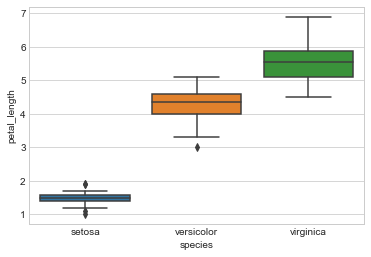

In [ ]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

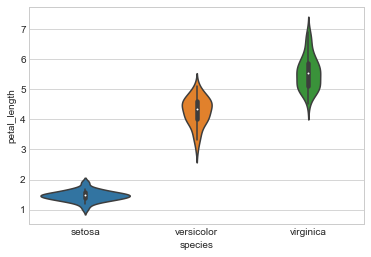

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# Task 1:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. 

# Objective: 
## To classify patients status as survived(1) or not(2) 5 years post operation based on information regarding age, year of operation for breast cancer and auxilary nodes

# High Level Statistics and Univariate Analysis

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns

df = pd.read_csv("/home/shravan/Downloads/haberman.csv")

In [12]:
df.shape

(305, 4)

In [13]:
df.columns = ['Age','Op_Year','Axil_Nodes','Status']

In [14]:
df

,Age,Op_Year,Axil_Nodes,Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [15]:
df.isna().sum()

Age           0
Op_Year       0
Axil_Nodes    0
Status        0
dtype: int64

In [16]:
df.describe()

,Age,Op_Year,Axil_Nodes,Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


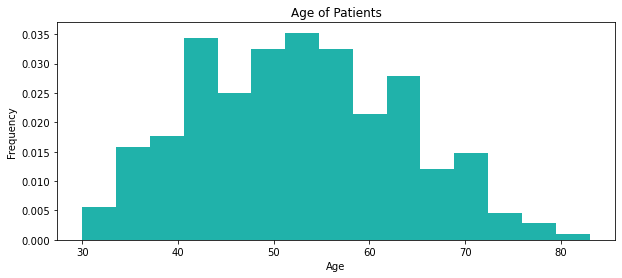

In [17]:
import matplotlib.pyplot as plt
plt.title("Age of Patients")
plt.rcParams["figure.figsize"] = (10,4)
plt.hist(df["Age"],15, histtype = "bar", color = "lightseagreen", density = True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


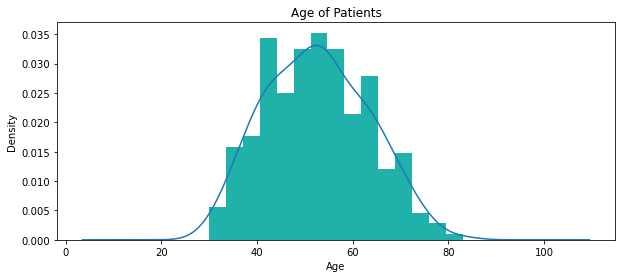

In [18]:
plt.rcParams["figure.figsize"] = (10,4)
plt.title("Age of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
df["Age"].plot(kind = "hist", density = True, bins = 15, color = "lightseagreen") # change density to true, because KDE uses density
df["Age"].plot(kind = "kde")
plt.show()

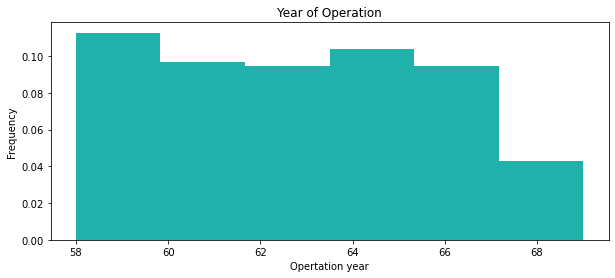

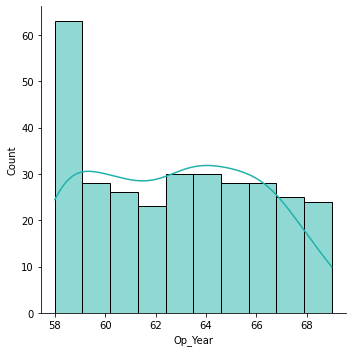

In [19]:
plt.rcParams["figure.figsize"] = (10,4)
plt.title("Year of Operation")
plt.xlabel("Opertation year")
plt.ylabel("Count")
df["Op_Year"].plot(kind = "hist", density = True, bins = 6, color = "lightseagreen") # change density to true, because KDE uses density
#df["Op_Year"].plot(kind = "kde")
sns.displot(df["Op_Year"], kde = True, color = "lightseagreen")
plt.show()

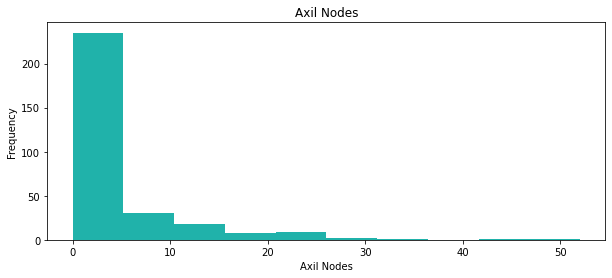

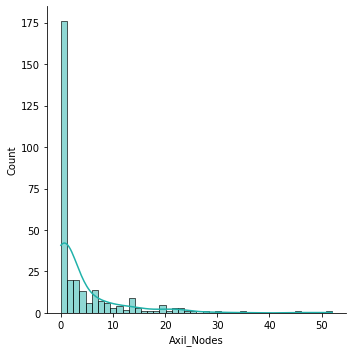

In [20]:
plt.rcParams["figure.figsize"] = (10,4)
plt.title("Axil Nodes")
plt.xlabel("Axil Nodes")
plt.ylabel("Count")
df["Axil_Nodes"].plot(kind = "hist", color = "lightseagreen") # change density to true, because KDE uses density
sns.displot(df["Axil_Nodes"], kde = True, color = "lightseagreen")
plt.show()

In [21]:
df["Status"].value_counts()

1    224
2     81
Name: Status, dtype: int64

Total Number of Patients:  305
% of Patients who died before 5 years of the operation:  26.557377049180324 %
% of Patients who survived after 5 years of the operation:  73.44262295081967 %


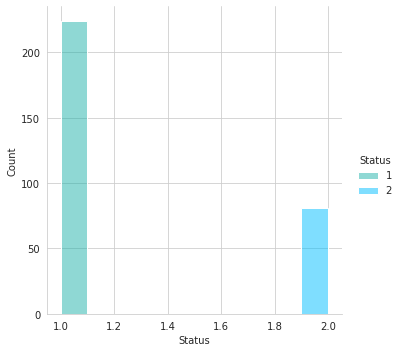

In [24]:
print("Total Number of Patients: ", len(df))
print("% of Patients who died before 5 years of the operation: ", 81/len(df)*100, "%")
print("% of Patients who survived after 5 years of the operation: ", 224/len(df)*100, "%")

sns.displot(data=df, x=df["Status"],hue= tar, palette= ["lightseagreen","deepskyblue"])
plt.show()

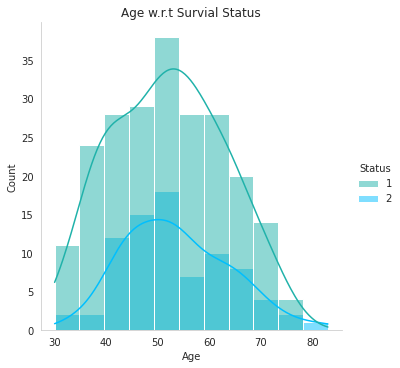

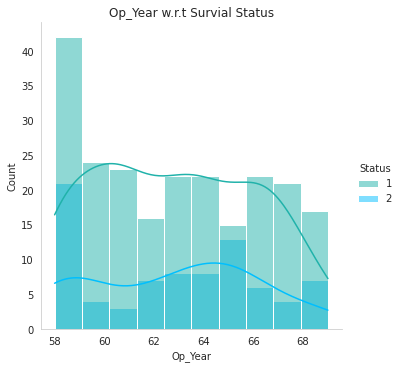

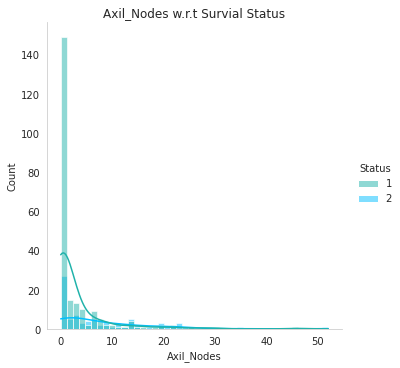

In [23]:
import seaborn as sns
feat = df.columns[:-1]
tar = df.columns[-1]
for i in feat:
    sns.set_style("whitegrid")
    sns.displot(data=df, x=i, kde = True, hue= tar, palette= ["lightseagreen","deepskyblue"])
    plt.title(f'{i} w.r.t Survial Status')
    plt.grid()
    plt.show()

In [69]:
def get_per(a,b, s):
    l1 = len(df[(df[s] >= a) & (df[s] <=b) & (df['Status']== 2)])
    l2 = len(df[(df[s] >= a) & (df[s] <=b) & (df['Status']== 1)])
    return (l1/(l1+l2)*100)


i = 30
while(i<=70):
    print("Percentage of patients in age group ", i," to ", i+10, "who died within 5 years of the Operation: ", get_per(i,i+10, 'Age'))
    i+=10
print("\n")
i = 58
while(i<=69):
    print("Percentage with Operation Year in range ", i," to ", i+2, "who died within 5 years of the Operation: ", get_per(i,i+2, 'Op_Year'))
    i+=2

print("\n")
i = 0
while(i<=35):
    print("Percentage with Axil Nodes in range ", i," to ", i+5, "who died within 5 years of the Operation: ", get_per(i,i+2, 'Axil_Nodes'))
    i+=5

Percentage of patients in age group  30  to  40 who died within 5 years of the Operation:  9.523809523809524
Percentage of patients in age group  40  to  50 who died within 5 years of the Operation:  30.208333333333332
Percentage of patients in age group  50  to  60 who died within 5 years of the Operation:  26.666666666666668
Percentage of patients in age group  60  to  70 who died within 5 years of the Operation:  28.985507246376812
Percentage of patients in age group  70  to  80 who died within 5 years of the Operation:  25.0


Percentage with Operation Year in range  58  to  60 who died within 5 years of the Operation:  27.472527472527474
Percentage with Operation Year in range  60  to  62 who died within 5 years of the Operation:  18.181818181818183
Percentage with Operation Year in range  62  to  64 who died within 5 years of the Operation:  27.710843373493976
Percentage with Operation Year in range  64  to  66 who died within 5 years of the Operation:  31.3953488372093
Percentag

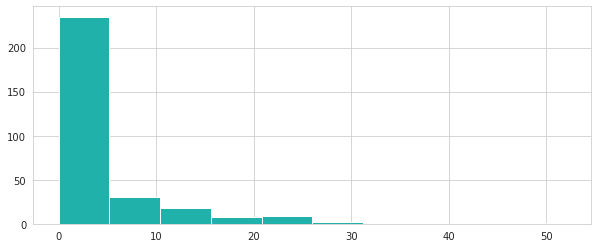

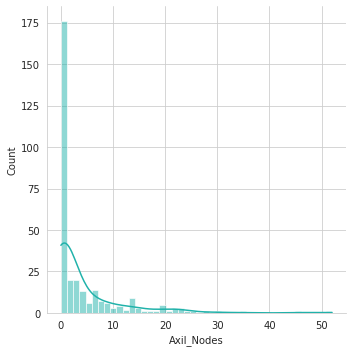

In [25]:
plt.hist(df["Axil_Nodes"], color = "lightseagreen")
sns.displot(df["Axil_Nodes"], kde = True, color = "lightseagreen")
plt.show()

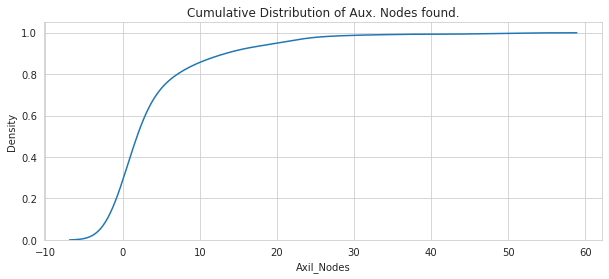

In [26]:
sns.kdeplot(data=df, x=df["Axil_Nodes"], cumulative = True)
plt.title("Cumulative Distribution of Aux. Nodes found.")
plt.show()

## Univariate Analysis - Inference

* Maximum number of people have died within 5 years of the operation when they belong to the age group of 40-55
* High percentage of people who undergo operation at an age of 40-50, do not survive beyond 5 years since the operation
* High percentage of patients from years 64-66 have not survived beyond 5 years since the operation
* Patients under the age of 40 seldom fall under status 2
* Since the 1958 there has been an evident decline in the number of patients
* Patients with 0 aux. nodes found tend to live longer after the operation
* Although there are a few cases with high number of Auxilary Nodes, the cases are at high risk

# Bivariate Analysis

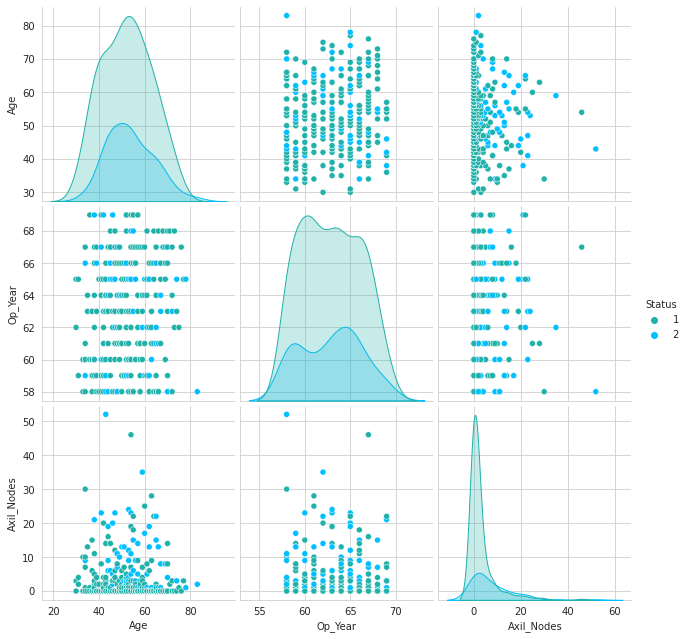

In [27]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Status", height=3, palette = ["lightseagreen","deepskyblue"])
plt.show()

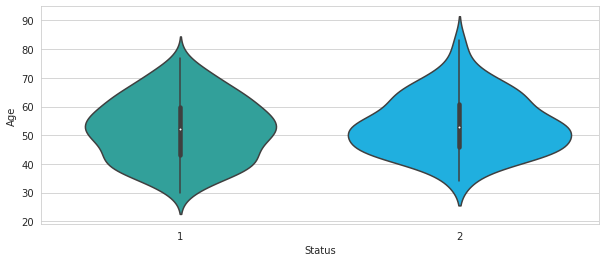

In [28]:
sns.violinplot(x="Status", y="Age", data=df, size=8, palette = ["lightseagreen","deepskyblue"])
plt.show()

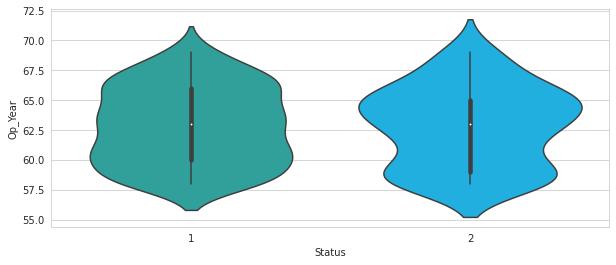

In [29]:
sns.violinplot(x="Status", y="Op_Year", data=df, size=8,palette = ["lightseagreen","deepskyblue"])
plt.show()

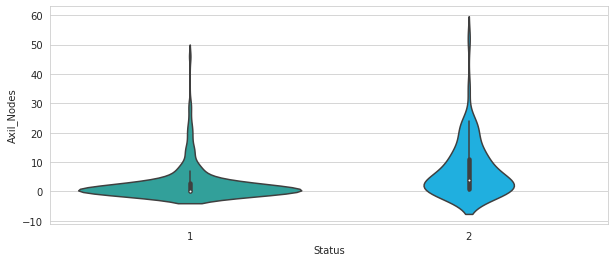

In [30]:
sns.violinplot(x="Status", y="Axil_Nodes", data=df, size=8, palette = ["lightseagreen","deepskyblue"])
plt.show()

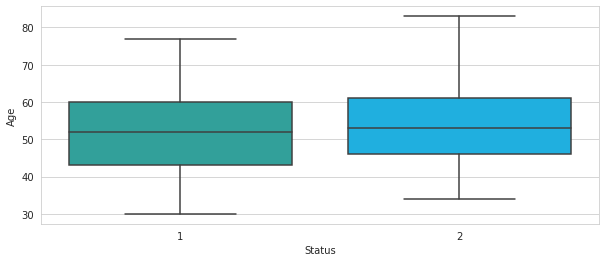

In [31]:
sns.boxplot(x="Status", y="Age", data=df, palette = ["lightseagreen","deepskyblue"])
plt.show()

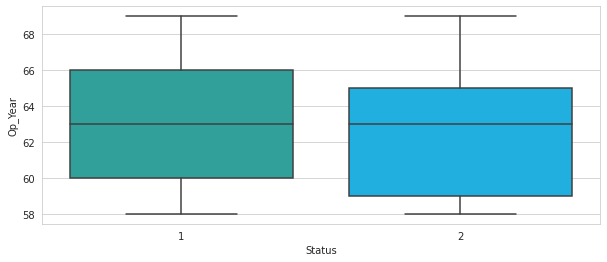

In [32]:
sns.boxplot(x="Status", y="Op_Year", data=df, palette = ["lightseagreen","deepskyblue"])
plt.show()

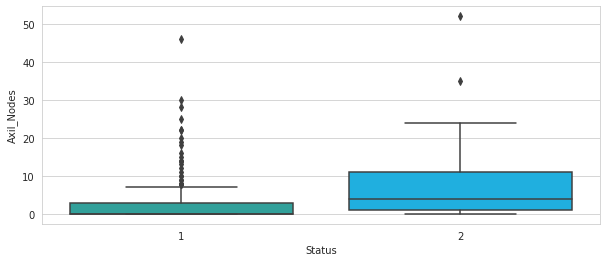

In [33]:
sns.boxplot(x="Status", y="Axil_Nodes", data=df, palette = ["lightseagreen","deepskyblue"])
plt.show()

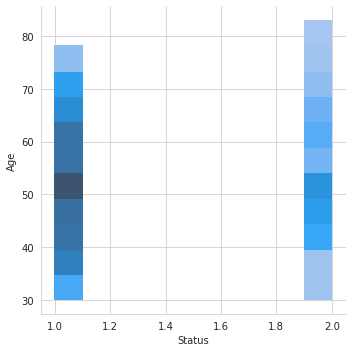

In [34]:
sns.displot(data=df, x="Status", y="Age")

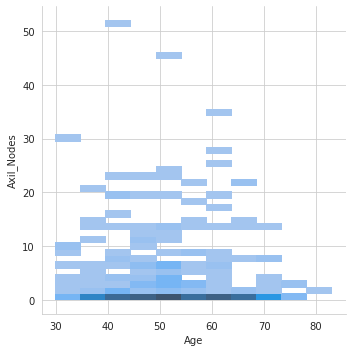

In [35]:
sns.displot(data=df, x="Age", y="Axil_Nodes")

# Bivariate Analysis - Inference

* Most patients had 0 or 1 aux. nodes found but as the number of auxiliary nodes increases, the more dangerous it gets for the patient, although there are few cases with high number of nodes.
* High number of patients of age 45-65 years and the patients within 40-55 years of age fell under status 2 (died within 5 years of the operation).
* Nodes vs Status boxplot shows the least overlap as most patients with status = 1 had less nodes and as the aux. nodes increased, the danger tends to increase and the more likely they are to falling in status = 2 group. Hence, there are some status 1 patients with high aux. nodes found as well.
* In 1964, the number of patients falling into status 2 class increased but majority were still in status 1. This trend followed every year but was the worse in 1964.
* The total number of patients decreased over time.
* The nodes feature might have outliers present.